In [1]:
import os
import glob
#import tqdm
import numpy as np
#import pandas as pd
import multiprocessing
import pydicom as dicom
import nibabel as nib
#from keras import utils as kutils
from matplotlib import pyplot as plt

def load_image(label_fpath, transpose=False):
    #encode_name = label_fpath[-39: -7]
    label_data = nib.load(label_fpath)
    label_array = label_data.get_fdata()
    if transpose:
        label_array = np.transpose(label_array, axes=(2, 1, 0))
    return  label_array#, encode_name

In [2]:
cd ..

/home/u/wartytw


In [3]:
import pandas as pd
info = pd.read_csv('/data2/pancreas/Nifti_data/data_list.csv')

In [3]:
import cv2
import numpy as np
np.set_printoptions(suppress=True)
def glcm(arr, d_x, d_y, gray_level=16):
    '''計算並返回歸一化後的灰度共生矩陣'''
    max_gray = arr.max() + 1
    #若灰度級數大於gray_level，則將影象的灰度級縮小至gray_level，減小灰度共生矩陣的大小
    arr = arr * gray_level // max_gray
    ret = np.zeros([gray_level, gray_level])
    for j in range(height - d_y):
        for i in range(width - d_x):
            rows = arr[j][i]
            cols = arr[j + d_y][i + d_x]
            ret[rows][cols] += 1.0
    return ret / float(arr.shape[0] * arr.shape[1]) # 歸一化

# if __name__=='__main__':
#     fp = '/home/mamq//images/3.jpg'
#     img = cv2.imread(fp)
#     img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     glcm_0 = glcm(img_gray, 1,0) # 水平方向
#     #glcm_1 = glcm(img_gray, 0,1) # 45度方向
#     #glcm_2 = glcm(img_gray, 1,1) # 垂直方向
#     #glcm_3 = glcm(img_gray, -1,1) # 135度方向

In [38]:
test = np.array([[1, 2, 6], [3, 6, 2]])



import cv2
import math

#定义最大灰度级数
gray_level = 6

def maxGrayLevel(img):
    max_gray_level=0
    (height,width)=img.shape
    for y in range(height):
        for x in range(width):
            if img[y][x] > max_gray_level:
                max_gray_level = img[y][x]
    return max_gray_level+1

def getGlcm(input,d_x,d_y):
    srcdata=input.copy()
    ret=[[0.0 for i in range(gray_level)] for j in range(gray_level)]
    (height,width) = input.shape
    
    max_gray_level=maxGrayLevel(input)
    
    #若灰度级数大于gray_level，则将图像的灰度级缩小至gray_level，减小灰度共生矩阵的大小
    if max_gray_level > gray_level:
        for j in range(height):
            for i in range(width):
                srcdata[j][i] = srcdata[j][i]*gray_level / max_gray_level

    for j in range(height-abs(d_y)):
        for i in range(width-abs(d_x)):
            rows = srcdata[j][i]
            cols = srcdata[j + d_y][i+d_x]
            ret[rows][cols]+=1.0

    for i in range(gray_level):
        for j in range(gray_level):
            ret[i][j]/=float(height*width)

    return np.array(ret)



In [37]:
glcm_0=getGlcm(test, 1,-1)

In [39]:
glcm_0

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.16666667],
       [0.        , 0.16666667, 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]])

# load existing data

In [4]:
image_path = "/data2/pancreas/Nifti_data/image"
label_path = "/data2/pancreas/Nifti_data/label"

In [5]:
resec_train = np.load("resec_train.npy")
resec_val = np.load("resec_val.npy")
y_train = np.load("y_train.npy")
y_val = np.load("y_val.npy")

resec = np.concatenate([resec_train,resec_val], axis = 0)
y = np.concatenate([y_train, y_val], axis = 0)

box_tumor = np.load("box_tumor.npy")
box_pancreas = np.load("box_pancreas.npy")

import pandas as pd
info = pd.read_csv('/data2/pancreas/Nifti_data/data_list.csv')

In [43]:
#pd.DataFrame(info.groupby(['resection', pos_type[0]]).case_id)[1][1].iloc[0]
pos_type = ['SMV', 'CBD',  'retroperitoneal']
pos_01x_num = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
pos_01x = [[[], [], []], [[], [], []], [[], [], []]]
for idx, t in enumerate(pos_type):
    for i in range(3):
        N = len(pd.DataFrame(info.groupby(['resection', t]).case_id)[1][i])
        for n in range(N):
            name = pd.DataFrame(info.groupby(['resection', t]).case_id)[1][i].iloc[n]
            name_idx = np.where(resec==name)[0][0]
            val = box_tumor[name_idx, 5] - box_tumor[name_idx, 4]
            pos_01x_num[idx][i]+=val

(141, 6)

In [56]:
t = 'SMV'
i = 0
pd.DataFrame(info.groupby(['resection', t]).case_id)[1][i]#i == 0 : resec[t] == 0, and so on 

n = 0
name = pd.DataFrame(info.groupby(['resection', t]).case_id)[1][i].iloc[n]# name : name of resec when type == t and resec[t] == i
name_idx = np.where(resec==name)[0][0]

In [5]:
image = load_image(os.path.join(image_path, "IM_"+name+".nii.gz"))
label = load_image(os.path.join(label_path, "LB_"+name+".nii.gz"))

NameError: name 'image_path' is not defined

In [58]:
box_tumor[name_idx, 4]

509.0

In [67]:
label.shape

(512, 512, 1023)

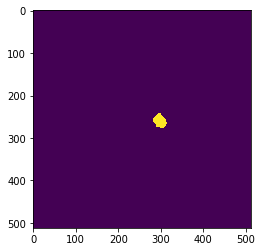

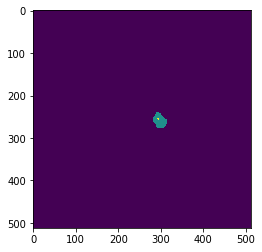

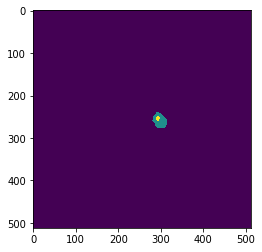

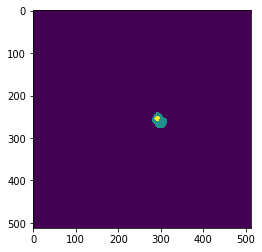

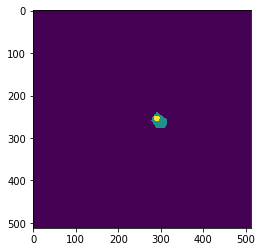

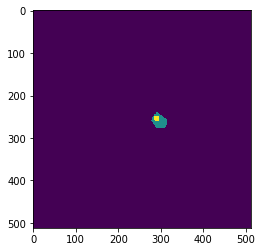

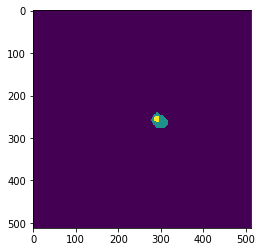

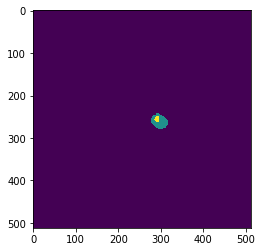

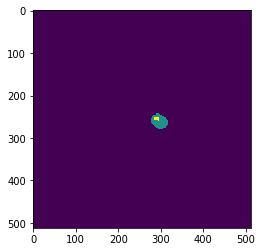

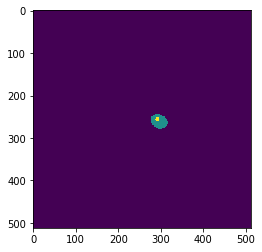

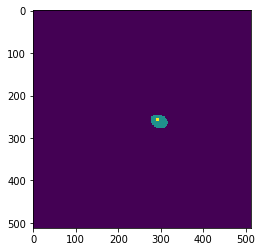

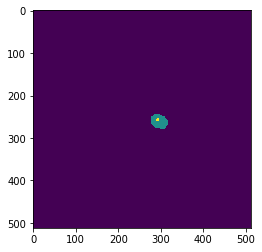

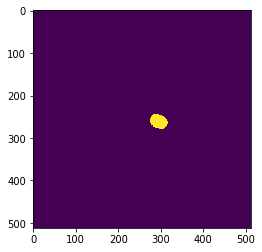

In [65]:
for i in range(int(box_tumor[name_idx, 4]) - 1, int(box_tumor[name_idx, 5])+2):
    plt.imshow(label[..., i])
    plt.show()

In [68]:
#how big one input slide should be (depend on pancreas)
print(max(box_pancreas[:, 1]) - max(box_pancreas[:, 0]))
print(max(box_pancreas[:, 3]) - max(box_pancreas[:, 2]))

259.0
61.0


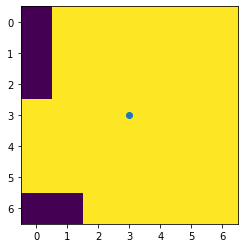

In [100]:
# extract center
tmp_slide = label[..., int(box_tumor[name_idx, 5])]
down = max(np.where(tmp_slide == 2)[0])
top = min(np.where(tmp_slide == 2)[0])
r = max(np.where(tmp_slide == 2)[1])
l = min(np.where(tmp_slide == 2)[1])
plt.imshow(tmp_slide[top:down+1, l:r+1])
plt.plot(int((down + top)/2) - top, int((r + l)/2) - l, 'o')

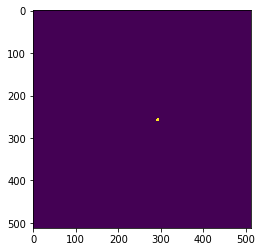

In [108]:
#from label(whole pancreas) to tumor_only masking 
t_tmp_slide = np.zeros((tmp_slide.shape[0], tmp_slide.shape[1]))
for i in range(tmp_slide.shape[0]):
    for j in range(tmp_slide.shape[1]):
        if(tmp_slide[i, j] == 2):
            t_tmp_slide[i, j] = 2
plt.imshow(t_tmp_slide)
plt.show()
            

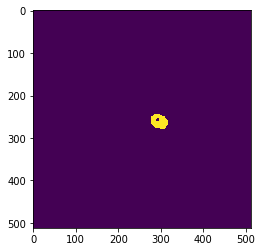

In [116]:
#masking for pancreas-tumor
tt_tmp_slide = np.zeros((tmp_slide.shape[0], tmp_slide.shape[1]))
for i in range(tmp_slide.shape[0]):
    for j in range(tmp_slide.shape[1]):
        if(tmp_slide[i, j] != 0 and t_tmp_slide[i, j] != 2):
            tt_tmp_slide[i, j] = 1
plt.imshow(tt_tmp_slide)
plt.show()

Using TensorFlow backend.


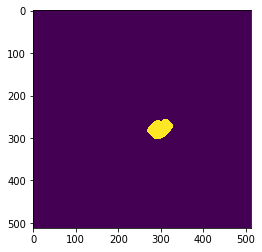

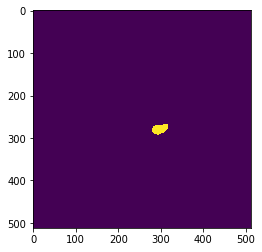

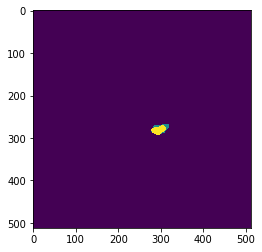

In [15]:
#dilation
from keras.utils import to_categorical
from scipy import ndimage

plt.imshow(ndimage.binary_dilation(tmp_slide, iterations = 10).astype(tmp_slide.dtype))
plt.show()
plt.imshow(ndimage.binary_erosion(tmp_slide, iterations = 1).astype(tmp_slide.dtype))
plt.show()
plt.imshow(tmp_slide)
plt.show()


# Dilation panceas, Extract panceas - tumor, then Divide into three part and use glcm to Extract feacture

## 1.  Load image and label

In [4]:
#dilation panceas, extract panceas - tumor, then divide into three part and use glcm to extract feacture

# pd.DataFrame(info.groupby(['resection', t]).case_id)[1][i]#i == 0 : resec[t] == 0, and so on 
# name = pd.DataFrame(info.groupby(['resection', t]).case_id)[1][i].iloc[n]# name : name of resec when type == t and resec[t] == i
# name_idx = np.where(resec==name)[0][0]

image = load_image(os.path.join(image_path, "IM_"+name+".nii.gz"))
label = load_image(os.path.join(label_path, "LB_"+name+".nii.gz"))
i = int(box_tumor[name_idx, 5])
tmp_slide = label[..., i]
tmp_slide_img = image[..., i]



NameError: name 'image_path' is not defined

## 2. Get center

In [13]:
down = max(np.where(tmp_slide == 2)[0])
top = min(np.where(tmp_slide == 2)[0])
r = max(np.where(tmp_slide == 2)[1])
l = min(np.where(tmp_slide == 2)[1])
#plt.imshow(tmp_slide[top:down+1, l:r+1])
center = int((down + top)/2), int((r + l)/2)
#plt.plot(center, 'o')


## 3. Dilation for pancreas & Erosion for tumor

In [27]:
from keras.utils import to_categorical
from scipy import ndimage




#from label(whole pancreas) to tumor_only masking
def extract_tumor(tmp_slide):
    t_tmp_slide = np.zeros((tmp_slide.shape[0], tmp_slide.shape[1]))
    for i in range(tmp_slide.shape[0]):
        for j in range(tmp_slide.shape[1]):
            if(tmp_slide[i, j] == 2):
                t_tmp_slide[i, j] = 2
    return t_tmp_slide



In [ ]:
dilation_pancreas = ndimage.binary_dilation(tmp_slide, iterations = 10).astype(tmp_slide.dtype)
erosion_tumor = ndimage.binary_erosion(extract_tumor(tmp_slide), iterations = 1).astype(tmp_slide.dtype)

#### 3-1. check images

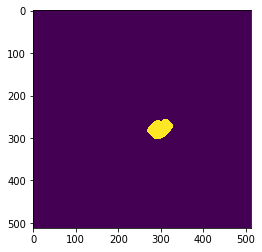

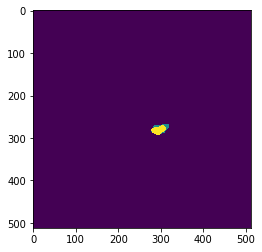

In [17]:
plt.imshow(dilation_pancreas)
plt.show()
plt.imshow(tmp_slide)
plt.show()

## 4. masking for dilation and erosion on image

In [28]:
#masking for pancreas-tumor
def masking_dilation_erosion(tmp_slide, t_tmp_slide):
    tt_tmp_slide = np.zeros((tmp_slide.shape[0], tmp_slide.shape[1]))
    for i in range(tmp_slide.shape[0]):
        for j in range(tmp_slide.shape[1]):
            if(tmp_slide[i, j] != 0 and t_tmp_slide[i, j] != 1):
                tt_tmp_slide[i, j] = 1
    return tt_tmp_slide


In [ ]:
final_masking_label = masking_dilation_erosion(dilation_pancreas, erosion_tumor)

#### 4-1. check masking

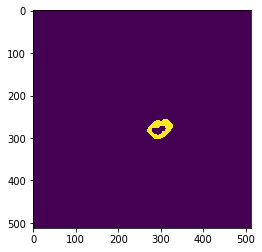

In [19]:
plt.imshow(masking_dilation_erosion(dilation_pancreas, erosion_tumor))
plt.show()

## 5. Divide into three part

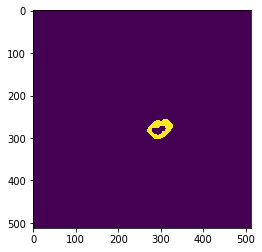

In [20]:
plt.imshow(final_masking_label)

In [21]:
final_masking_label.shape

(512, 512)

In [22]:
CBD = final_masking_label[:center[0], :center[1]]
CBD_tmp_slide_img = tmp_slide_img[:center[0], :center[1]]

SMV = final_masking_label[:center[0], center[1]:]
SMV_tmp_slide_img = tmp_slide_img[:center[0], center[1]:]

Retro = final_masking_label[center[0]:, :]
Retro_tmp_slide_img = tmp_slide_img[center[0]:, :]
# plt.imshow(Retro)
# plt.show()


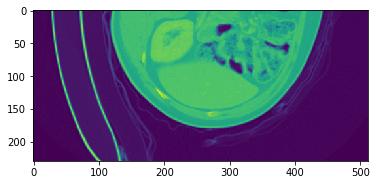

In [23]:
plt.imshow(Retro_tmp_slide_img)
plt.show()

## 6. Masking in image & GLCM in image

In [29]:
def masking_image(label, img):
    ll = np.zeros((label.shape[0], label.shape[1]))
    for i in range(label.shape[0]):
        for j in range(label.shape[1]):
            if(label[i, j] == 1):
                ll[i, j] = img[i, j]
    return ll


In [25]:
CBD_image = masking_image(CBD, CBD_tmp_slide_img)
SMV_image = masking_image(SMV, SMV_tmp_slide_img)
Retro_image = masking_image(Retro, Retro_tmp_slide_img)

#### 6-1. check the masking image

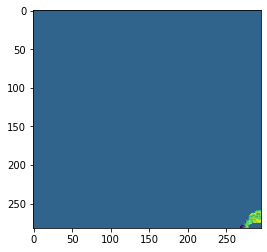

In [27]:
plt.imshow(CBD_image)

In [28]:
print(np.max(CBD_image))
print(np.max(SMV_image))
print(np.max(Retro_image))
print(np.max(tmp_slide_img))

112.0
151.0
119.0
1027.0


#### 6-2. Clip the image

In [30]:
def clip_image(img):
    top = max(np.where(img != 0)[0])
    down = min(np.where(img != 0)[0])
    r = max(np.where(img != 0)[1])
    l = min(np.where(img != 0)[1])
    return img[down:top+1, l:r+1]

In [ ]:
#check clip_image
# plt.imshow(clip_image(Retro_image))
# plt.show()

In [30]:
CBD_image = clip_image(CBD_image)
SMV_image = clip_image(SMV_image)
Retro_image = clip_image(Retro_image)

In [31]:
#each input slide is 100*100 vector, and a input include 3 slides(for CBD, SMV, Retro respectively)

import cv2
import math

#定义最大灰度级数
gray_level = 3001

def maxGrayLevel(img):
    max_gray_level=0
    (height,width)=img.shape
    for y in range(height):
        for x in range(width):
            if img[y][x] > max_gray_level:
                max_gray_level = img[y][x]
    return max_gray_level+1

def getGlcm(input,d_x,d_y):
    srcdata=input.copy()
    max_value = np.max(srcdata)
    min_value = np.min(srcdata)
    for i in range(srcdata.shape[0]):
        for j in range(srcdata.shape[1]):
            srcdata[i, j] = int((srcdata[i, j] - min_value)/(max_value - min_value)*(gray_level - 1))
#     print(srcdata)
    ret=[[0.0 for i in range(gray_level)] for j in range(gray_level)]
    (height,width) = input.shape
    
    max_gray_level=maxGrayLevel(input)
    
    #若灰度级数大于gray_level，则将图像的灰度级缩小至gray_level，减小灰度共生矩阵的大小
    
#     if max_gray_level > gray_level:
#         for j in range(height):
#             for i in range(width):
#                 srcdata[j][i] = srcdata[j][i]*gray_level / max_gray_level

    for j in range(height-abs(d_y)):
        for i in range(width-abs(d_x)):
            rows = int(srcdata[j][i])
            cols = int(srcdata[j + d_y][i+d_x])
            ret[rows][cols]+=1.0

#     for i in range(gray_level):
#         for j in range(gray_level):
#             ret[i][j]/=float(height*width)

    return np.array(ret)

In [ ]:
#test_image = getGlcm(Retro_image,-1,1)

# model input order

In [32]:
pd.DataFrame(info.groupby(['resection', 'SMV', 'CBD',  'retroperitoneal']).case_id).iloc[3]

pd.DataFrame(info.groupby(['resection', 'SMV', 'CBD',  'retroperitoneal']).case_id)[1][2].iloc[3]




'PC537'

In [5]:
#### take a look at the details of resection position

In [6]:
type_name_pd = pd.DataFrame(info.groupby(['resection', 'SMV', 'CBD',  'retroperitoneal']).case_id)
tt = 0
for i in range(len(type_name_pd) - 1):    #neglect x, x, x
    
    print(type_name_pd[0][i])
    n = len(type_name_pd[1][i])

    total_val = 0
    for j in range(n):
        name = type_name_pd[1][i].iloc[j]
        name_idx = np.where(resec == name)[0][0]
        val = box_tumor[name_idx, 5] - box_tumor[name_idx, 4] + 1
        print(name, val)
        total_val+=val
    print("total value = ", total_val)
    tt = total_val+tt
print("final_total =",  tt)

(1.0, '0', '0', '0')
PT7 11.0
PC607 8.0
PC602 3.0
PC600 5.0
PC593 3.0
PC573 2.0
PC570 1.0
PC561 6.0
PC536 2.0
PC595 3.0
PC580 3.0
PC556 3.0
PC540 2.0
PC768 7.0
total value =  59.0
(1.0, '0', '0', '1')
PC42 6.0
PC104 4.0
PC285 3.0
PC636 5.0
PC535 3.0
PC563 2.0
PC519 4.0
PC447 2.0
PC484 3.0
PC898 2.0
PC818 2.0
PC699 5.0
PC769 7.0
PC739 3.0
total value =  51.0
(1.0, '0', '1', '0')
PT12 6.0
PC581 3.0
PC544 10.0
PC537 4.0
total value =  23.0
(1.0, '1', '0', '0')
PT8 26.0
PC116 4.0
PC545 2.0
PC583 4.0
PC456 7.0
total value =  43.0
(1.0, '1', '0', '1')
PC477 7.0
total value =  7.0
final_total = 183.0


In [14]:
type_name_pd = pd.DataFrame(info.groupby(['resection', 'SMV', 'CBD',  'retroperitoneal']).case_id)

#create [name, index, y], notice that y = vector(5)
io_arr = [[] for i in range(3)]
num_type = len(type_name_pd) - 1
for i in range(num_type):    #neglect x, x, x
    vec5 = [0 for i in range(num_type)]
    vec5[i] = 1
    n = len(type_name_pd[1][i])
    total_val = 0
    for j in range(n):
        name = type_name_pd[1][i].iloc[j]
        name_idx = np.where(resec == name)[0][0]

        image = load_image(os.path.join(image_path, "IM_"+name+".nii.gz"))
        label = load_image(os.path.join(label_path, "LB_"+name+".nii.gz"))
        print(name)
        for k in range(int(box_tumor[name_idx, 4]), int(box_tumor[name_idx, 5])+1):
            
            tmp_slide = label[..., k]
            tmp_slide_img = image[..., k]
            if(np.where(tmp_slide == 2)[0].size == 0):
                continue
            io_arr[0].append(name)
            io_arr[1].append(k)
            io_arr[2].append(vec5)
        del image, label

PT7
PC607
PC602
PC600
PC593
PC573
PC570
PC561
PC536
PC595
PC580
PC556
PC540
PC768
PC42
PC104
PC285
PC636
PC535
PC563
PC519
PC447
PC484
PC898
PC818
PC699
PC769
PC739
PT12
PC581
PC544
PC537
PT8
PC116
PC545
PC583
PC456
PC477


In [192]:
len(io_arr[0])

179

In [185]:
name = 'PT7'
name_idx = np.where(resec == name)[0][0]
label = load_image(os.path.join(label_path, "LB_"+name+".nii.gz"))
print(int(box_tumor[name_idx, 4]), int(box_tumor[name_idx, 5])+1)

509 520


In [187]:
label[..., 510]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
order_arr = np.zeros((len(io_arr[0]), 1))
for i in range(order_arr.shape[0]):
    order_arr[i] = i
import random


#random.shuffle(order_arr)
np.random.shuffle(order_arr)
np.unique(order_arr)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [7]:
info['total'] = [1]*len(info)
pd.DataFrame(info.groupby(['resection']).sum().total)
pd.DataFrame(info.groupby(['resection', 'SMV', 'CBD',  'retroperitoneal', 'uncinate']).sum().total)

total
resection SMV CBD retroperitoneal uncinate       
1.0       0   0   0               1            14
                  1               0            10
                                  1             4
              1   0               0             3
                                  1             1
          1   0   0               0             5
                  1               0             1
          x   x   x               x            23

# Establish npz

In [37]:
mkdir glcm_inputs

In [12]:
cd /data2/pancreas/Nifti_data

/data2/pancreas/Nifti_data


In [14]:
mkdir wartytw_input

In [16]:
cd wartytw_input

/data2/pancreas/Nifti_data/wartytw_input


In [25]:
#load_image(os.path.join("../image/",  "IM_"+name+".nii.gz"))

In [42]:
cd wartytw_input/

/data2/pancreas/Nifti_data/wartytw_input


In [ ]:
ls

In [ ]:
# Establish The npz data (3 glcm slide for each input)
from keras.utils import to_categorical
from scipy import ndimage
type_name_pd = pd.DataFrame(info.groupby(['resection', 'SMV', 'CBD',  'retroperitoneal']).case_id)

#create [name, index, y], notice that y = vector(5)
kk = 0
num_type = len(type_name_pd) - 1
for i in range(num_type):    #neglect x, x, x
    vec5 = [0 for i in range(num_type)]
    vec5[i] = 1
    n = len(type_name_pd[1][i])
    total_val = 0
    for j in range(n):
        name = type_name_pd[1][i].iloc[j]
        
        name_idx = np.where(resec == name)[0][0]
        image = load_image(os.path.join("../image/", "IM_"+name+".nii.gz"))
        label = load_image(os.path.join("../label/", "LB_"+name+".nii.gz"))
        print(name)
        for k in range(int(box_tumor[name_idx, 4]), int(box_tumor[name_idx, 5])+1):
            
            tmp_slide = label[..., k]
            tmp_slide_img = image[..., k]
            if(np.where(tmp_slide == 2)[0].size == 0):
                continue
            down = max(np.where(tmp_slide == 2)[0])
            top = min(np.where(tmp_slide == 2)[0])
            r = max(np.where(tmp_slide == 2)[1])
            l = min(np.where(tmp_slide == 2)[1])
            center = int((down + top)/2), int((r + l)/2)
            dilation_pancreas = ndimage.binary_dilation(tmp_slide, iterations = 10).astype(tmp_slide.dtype)
            erosion_tumor = ndimage.binary_erosion(extract_tumor(tmp_slide), iterations = 1).astype(tmp_slide.dtype)
            final_masking_label = masking_dilation_erosion(dilation_pancreas, erosion_tumor)
            CBD = final_masking_label[:center[0], :center[1]]
            CBD_tmp_slide_img = tmp_slide_img[:center[0], :center[1]]

            SMV = final_masking_label[:center[0], center[1]:]
            SMV_tmp_slide_img = tmp_slide_img[:center[0], center[1]:]

            Retro = final_masking_label[center[0]:, :]
            Retro_tmp_slide_img = tmp_slide_img[center[0]:, :]

            
            CBD_image = masking_image(CBD, CBD_tmp_slide_img)
            SMV_image = masking_image(SMV, SMV_tmp_slide_img)
            Retro_image = masking_image(Retro, Retro_tmp_slide_img)
            
            CBD_image = clip_image(CBD_image)
            SMV_image = clip_image(SMV_image)
            Retro_image = clip_image(Retro_image)

            CBD_image = getGlcm(CBD_image,-1,1)
            SMV_image = getGlcm(SMV_image,1,1)
            Retro_image = getGlcm(Retro_image,0,-1)
            
            glcm_input = np.concatenate([np.expand_dims(getGlcm(CBD_image,-1,1), axis = 2), np.expand_dims(getGlcm(SMV_image,1,1), axis = 2), np.expand_dims(getGlcm(Retro_image,0,-1), axis = 2)], axis = 2)
            
            np.savez("glcm"+str(kk), glcm_input)

            print(kk)
            
            kk+=1
            del glcm_input
            
        
        del image, label

PT7
0
1
2
3
4
5
6
7
8
9
10
PC607
11
12
13
14
15
16
17
18
PC602
19
20
21
PC600
23
24
25
26
PC593
27
28
29
PC573
30
31
PC570
32
PC561
33
34
35
36
37
38
PC536
39
40
PC595
41
42
43
PC580
44
45
46
PC556
47


In [17]:
new_y = []

In [18]:
# Establish The npz data (3 glcm slide for each input)
from keras.utils import to_categorical
from scipy import ndimage
type_name_pd = pd.DataFrame(info.groupby(['resection', 'SMV', 'CBD',  'retroperitoneal']).case_id)

#create [name, index, y], notice that y = vector(5)
kk = 0
num_type = len(type_name_pd) - 1
for i in range(num_type):    #neglect x, x, x
    vec5 = [0 for i in range(num_type)]
    vec5[i] = 1
    n = len(type_name_pd[1][i])
    total_val = 0
    for j in range(n):
        name = type_name_pd[1][i].iloc[j]
        
        name_idx = np.where(resec == name)[0][0]
        image = load_image(os.path.join(image_path, "IM_"+name+".nii.gz"))
        label = load_image(os.path.join(label_path, "LB_"+name+".nii.gz"))
        print(name)
        for k in range(int(box_tumor[name_idx, 4]), int(box_tumor[name_idx, 5])+1):
            
            tmp_slide = label[..., k]
            tmp_slide_img = image[..., k]
            if(np.where(tmp_slide == 2)[0].size == 0):
                continue
            
            
            new_y.append(vec5)
            kk+=1
            
            
        
        del image, label

PT7
PC607
PC602
PC600
PC593
PC573
PC570
PC561
PC536
PC595
PC580
PC556
PC540
PC768
PC42
PC104
PC285
PC636
PC535
PC563
PC519
PC447
PC484
PC898
PC818
PC699
PC769
PC739
PT12
PC581
PC544
PC537
PT8
PC116
PC545
PC583
PC456
PC477


In [92]:
print(len(new_y))
print(len(glcm_data_list))

179
180


In [42]:
name = "PC544"
image = load_image(os.path.join(image_path, "IM_"+name+".nii.gz"))
label = load_image(os.path.join(label_path, "LB_"+name+".nii.gz"))

name_idx = np.where(resec == name)[0][0]

In [45]:
print(int(box_tumor[name_idx, 4]), int(box_tumor[name_idx, 5])+1)

56 66


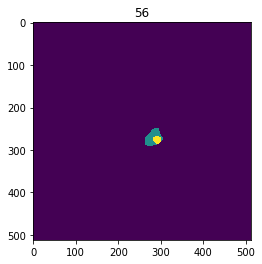

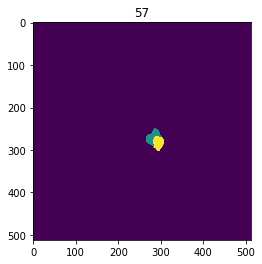

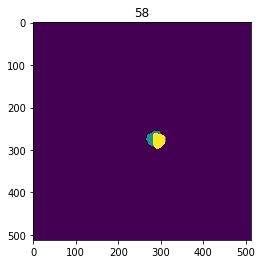

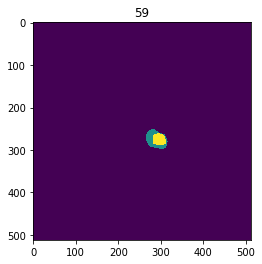

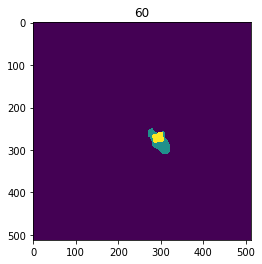

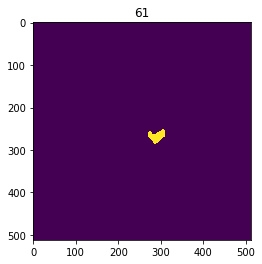

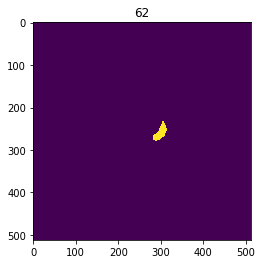

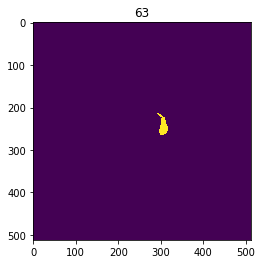

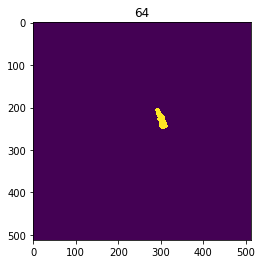

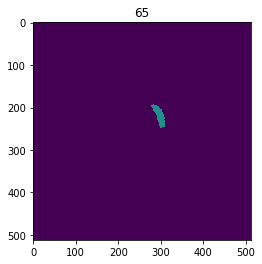

In [47]:
for i in range(int(box_tumor[name_idx, 4]), int(box_tumor[name_idx, 5])+1):
    plt.title(str(i))
    plt.imshow(label[..., i])
    plt.show()

In [75]:
i = 61
tmp_slide = label[..., i]
np.where(tmp_slide == 2)[0].size == 0


True

0

# Build Model 

In [19]:
from keras.models import Model#, load_model
from keras import layers as klayers
from keras.optimizers import Adam
from keras import utils as kutils
from keras import backend as K
from keras.callbacks import ModelCheckpoint

from keras.layers import Conv3D, MaxPool3D, Flatten, Dense
from keras.layers import Dropout, Input, BatchNormalization
from sklearn.metrics import confusion_matrix, accuracy_score
#from plotly.offline import iplot, init_notebook_mode
from keras.losses import categorical_crossentropy
from keras.optimizers import Adadelta
#import plotly.graph_objs as go
from matplotlib.pyplot import cm
from keras.models import Model
import numpy as np
import keras
import h5py

#init_notebook_mode(connected=True)
%matplotlib inline


from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, multiply, concatenate,  MaxPool2D, Reshape
# from keras.layers import BatchNormalization, Activation, Embedding, ZeroPadding2D, Lambda
from keras.layers.advanced_activations import LeakyReLU, ReLU
from keras.layers.convolutional import UpSampling2D, Conv2D, Conv1D
from keras.models import Sequential, Model
from keras.optimizers import Adam, SGD
from keras.utils import to_categorical
import keras.backend as K
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector, Reshape
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [23]:
order_arr.shape

(179, 1)

In [25]:
import pandas as pd
map_df = pd.DataFrame(data={'resec_name': io_arr[0], 'idx': io_arr[1], 'target':io_arr[2], 'order' : order_arr.reshape(len(io_arr[0]))})

In [54]:
from keras.utils import to_categorical
from scipy import ndimage
class resec_Generator1(kutils.Sequence):
    'Generates data for Keras'
    def __init__(self, mapping_df, batch_size, shuffle=True):
        'Initialization'
        self.mapping_df = mapping_df
        self.data_num   = mapping_df.shape[0]
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(self.data_num / self.batch_size))


    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        #print("enter0")
        batch_mapping_df = \
            self.mapping_df.iloc[index*self.batch_size: (index+1)*self.batch_size]

        # Generate data
        X, y = self.__data_generation(batch_mapping_df)
        return X, y


    def on_epoch_end(self):
        'Updates indexes after each epoch'
        if self.shuffle:
            self.mapping_df = self.mapping_df.sample(frac=1).reset_index(drop=True)
            
    def __data_generation(self, batch_mapping_df):
        'Generates data containing batch_size samples' 
        # Initialization
        X = np.zeros((  self.batch_size, 3000, 3000, 3, 1)) 


        y = np.zeros((self.batch_size, 5))

        # Generate data
        cnt = 0
        
        for i, row in batch_mapping_df.iterrows():
            #img = extract_cube(shape_tumor[row['shape']], load_image(os.path.join(image_path, "IM_"+row['resec_name']+".nii.gz")))
            idx = int(row['order'])#encode = row['resec_name']
            encode = io_arr[0][idx]
            image = load_image(os.path.join(image_path, "IM_"+encode+".nii.gz"))
            label = load_image(os.path.join(label_path, "LB_"+encode+".nii.gz"))
            k = io_arr[1][idx]
            tmp_slide = label[..., k]
            tmp_slide_img = image[..., k]
            if(np.where(tmp_slide == 2)[0].size == 0):
                continue
            down = max(np.where(tmp_slide == 2)[0])
            top = min(np.where(tmp_slide == 2)[0])
            r = max(np.where(tmp_slide == 2)[1])
            l = min(np.where(tmp_slide == 2)[1])
            center = int((down + top)/2), int((r + l)/2)
            dilation_pancreas = ndimage.binary_dilation(tmp_slide, iterations = 10).astype(tmp_slide.dtype)
            erosion_tumor = ndimage.binary_erosion(extract_tumor(tmp_slide), iterations = 1).astype(tmp_slide.dtype)
            final_masking_label = masking_dilation_erosion(dilation_pancreas, erosion_tumor)
            CBD = final_masking_label[:center[0], :center[1]]
            CBD_tmp_slide_img = tmp_slide_img[:center[0], :center[1]]

            SMV = final_masking_label[:center[0], center[1]:]
            SMV_tmp_slide_img = tmp_slide_img[:center[0], center[1]:]

            Retro = final_masking_label[center[0]:, :]
            Retro_tmp_slide_img = tmp_slide_img[center[0]:, :]

            
            CBD_image = masking_image(CBD, CBD_tmp_slide_img)
            SMV_image = masking_image(SMV, SMV_tmp_slide_img)
            Retro_image = masking_image(Retro, Retro_tmp_slide_img)
            
            CBD_image = clip_image(CBD_image)
            SMV_image = clip_image(SMV_image)
            Retro_image = clip_image(Retro_image)

            CBD_image = getGlcm(CBD_image,-1,1)
            SMV_image = getGlcm(SMV_image,1,1)
            Retro_image = getGlcm(Retro_image,0,-1)
            
            glcm_input = np.concatenate([np.expand_dims(getGlcm(CBD_image,-1,1), axis = 2), np.expand_dims(getGlcm(SMV_image,1,1), axis = 2), np.expand_dims(getGlcm(Retro_image,0,-1), axis = 2)], axis = 2)

            #print(encode)
            X[ cnt, :, :, :, 0] = glcm_input[:3000, :3000, :]
            del image, label
            y[cnt, :] = io_arr[2][idx]


            cnt += 1
        #print(X[5])
        return X, y

# for name in resec:
#     img = load_image(os.path.join(image_path, "IM_"+name+".nii.gz"))

In [ ]:
# a = [[1, 2, 3], ["d", "v", "r"]]

# np.random.shuffle(a, axis = 1)

# a = np.array(a)
# a = np.swapaxes(a,0, 1)
# print(a)
# np.random.shuffle(a)
# print(a)

In [81]:
glcm_data_list = os.listdir("../glcm_inputs")
print(len(glcm_data_list))

180


In [82]:
glcm_data_list[0]

'glcm135.npz'

In [96]:
# # import pandas as pd
# map_df = pd.DataFrame(data={'order':order})

In [172]:
# from keras.utils import to_categorical
# from scipy import ndimage
# class resec_Generator1(kutils.Sequence):
#     'Generates data for Keras'
#     def __init__(self, mapping_df, batch_size, shuffle=True):
#         'Initialization'
#         self.mapping_df = mapping_df
#         self.data_num   = mapping_df.shape[0]
#         self.batch_size = batch_size
#         self.shuffle = shuffle
#         self.on_epoch_end()

#     def __len__(self):
#         'Denotes the number of batches per epoch'
#         return int(np.floor(self.data_num / self.batch_size))


#     def __getitem__(self, index):
#         'Generate one batch of data'
#         # Generate indexes of the batch
#         #print("enter0")
#         batch_mapping_df = \
#             self.mapping_df.iloc[index*self.batch_size: (index+1)*self.batch_size]

#         # Generate data
#         X, y = self.__data_generation(batch_mapping_df)
#         return X, y


#     def on_epoch_end(self):
#         'Updates indexes after each epoch'
#         if self.shuffle:
#             self.mapping_df = self.mapping_df.sample(frac=1).reset_index(drop=True)
            
#     def __data_generation(self, batch_mapping_df):
#         'Generates data containing batch_size samples' 
#         # Initialization
#         X = np.zeros((  self.batch_size, 501, 501, 3, 1)) 

#         y = np.zeros((self.batch_size, 5))

#         # Generate data
#         cnt = 0
        
#         for i, row in batch_mapping_df.iterrows():
  
#             order = row['order']
#             a = np.load("glcm"+str(order)+".npz")
#             X[ cnt, :, :, :, 0] = a['arr_0'][:501, :501, :]
#             y[cnt, :] = new_y[row['order']]

#             del a
#             cnt += 1
#         #print(X[5])
#         return X, y

# # for name in resec:
# #     img = load_image(os.path.join(image_path, "IM_"+name+".nii.gz"))

In [93]:
order = np.array([i for i in range(len(new_y))])
np.random.shuffle(order)
print(order)

[ 55  49  43  95   2  63 142 110  21 118 163 113 109 157 173  11  44 154
 131 141 144  10  72 145  52 108   6  79  12 174  50  71  17 128  59   8
  47  82  16  67  51 122   9  25  15   0 160  24  36 178 169  19  78  32
  26 112 177  20  56 162  61 165 111  62 121  66 171 125  98   7 120  94
 123  23  65 104  91  38  74   4 132 126 151  22  68  92  96 102 152 139
  83  30  28   3  77   5 161 143   1 158  97  45  64 105 172 155  34  86
  33 176  40 100  76  60 150 114  13  88 136 133  54 124  85 148  93  35
 127  70  84  90 115 153 119 168  81 106 156 167  42 147  18 140 164  27
  29 129 149  57 138  75  41 146  14 101  48  53 135  39  89 175  31  37
 107 103 130  69 137  80  99 116  87 166 170  46  58  73 159 117 134]


In [48]:
from keras import metrics
tmp_x = Input(( 3000, 3000, 3, 1))

x = Reshape(( 300, 300, 300, 1))(tmp_x)
x = Conv3D(filters=16, dilation_rate=1, kernel_size=(3, 3, 3), activation='relu',kernel_initializer = keras.initializers.he_normal(seed=None))(x)
x = MaxPool3D()(x)
x = MaxPool3D()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = MaxPool3D()(x)



x = Conv3D(filters=8, dilation_rate=1, kernel_size=(3, 3, 3), activation='relu',kernel_initializer = keras.initializers.he_normal(seed=None))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = MaxPool3D()(x)

x = Conv3D(filters=8, dilation_rate=1, kernel_size=(3, 3, 3), activation='relu',kernel_initializer = keras.initializers.he_normal(seed=None))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = MaxPool3D()(x)

# x = Conv3D(filters=4, dilation_rate=1, kernel_size=(3, 3, 3), activation='relu',kernel_initializer = keras.initializers.he_normal(seed=None))(tmp_x)
# x = BatchNormalization()(x)
# x = Dropout(0.5)(x)

# x = Conv3D(filters=2, dilation_rate=1, kernel_size=(3, 3, 3), activation='relu',kernel_initializer = keras.initializers.he_normal(seed=None))(tmp_x)
# x = BatchNormalization()(x)
# x = Dropout(0.5)(x)



x = Flatten()(x)
x = Dense(units=100, kernel_initializer = keras.initializers.he_normal(seed=None), activation='elu')(x)
x = Dense(units=50, activation='selu')(x)
x = Dense(units=10, activation='relu')(x)




x = Dense(5, activation='sigmoid')(x)





model = Model(inputs=tmp_x, outputs=x)
adam_lr = 0.0003
adam_beta_1 = 0.5
model.compile(optimizer=Adam(lr=adam_lr, beta_1=adam_beta_1),
              loss='categorical_crossentropy', metrics = [metrics.categorical_accuracy])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 3000, 3000, 3, 1)  0         
_________________________________________________________________
reshape_16 (Reshape)         (None, 300, 300, 300, 1)  0         
_________________________________________________________________
conv3d_58 (Conv3D)           (None, 298, 298, 298, 16) 448       
_________________________________________________________________
max_pooling3d_42 (MaxPooling (None, 149, 149, 149, 16) 0         
_________________________________________________________________
max_pooling3d_43 (MaxPooling (None, 74, 74, 74, 16)    0         
_________________________________________________________________
batch_normalization_58 (Batc (None, 74, 74, 74, 16)    64        
_________________________________________________________________
dropout_58 (Dropout)         (None, 74, 74, 74, 16)    0         
__________

In [55]:
batch_size = 1
v_generator = resec_Generator1(map_df[:-20], batch_size=batch_size)
validation_generator = resec_Generator1(map_df[-20:], batch_size=batch_size)

In [174]:
#a = np.load("glcm"+str(order[0])+".npz")


In [175]:
#a['arr_0']

In [56]:
history = model.fit_generator(v_generator,
                              epochs=100, validation_data=validation_generator)

Epoch 1/100


ResourceExhaustedError: OOM when allocating tensor with shape[5360424596,100] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cuda_host_bfc
	 [[Node: dense_5/truncated_normal/TruncatedNormal = TruncatedNormal[T=DT_INT64, dtype=DT_FLOAT, seed=87654321, seed2=5361631, _device="/job:localhost/replica:0/task:0/device:CPU:0"](dense_5/truncated_normal/shape)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


Caused by op 'dense_5/truncated_normal/TruncatedNormal', defined at:
  File "/opt/anaconda3/5.2.0/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/opt/anaconda3/5.2.0/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/opt/anaconda3/5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/5.2.0/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/opt/anaconda3/5.2.0/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/opt/anaconda3/5.2.0/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/opt/anaconda3/5.2.0/lib/python3.6/asyncio/base_events.py", line 438, in run_forever
    self._run_once()
  File "/opt/anaconda3/5.2.0/lib/python3.6/asyncio/base_events.py", line 1451, in _run_once
    handle._run()
  File "/opt/anaconda3/5.2.0/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/opt/anaconda3/5.2.0/lib/python3.6/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/opt/anaconda3/5.2.0/lib/python3.6/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/opt/anaconda3/5.2.0/lib/python3.6/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/opt/anaconda3/5.2.0/lib/python3.6/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/opt/anaconda3/5.2.0/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/opt/anaconda3/5.2.0/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/opt/anaconda3/5.2.0/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 272, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/opt/anaconda3/5.2.0/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/opt/anaconda3/5.2.0/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 542, in execute_request
    user_expressions, allow_stdin,
  File "/opt/anaconda3/5.2.0/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/opt/anaconda3/5.2.0/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/opt/anaconda3/5.2.0/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/opt/anaconda3/5.2.0/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2854, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/opt/anaconda3/5.2.0/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2880, in _run_cell
    return runner(coro)
  File "/opt/anaconda3/5.2.0/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/opt/anaconda3/5.2.0/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3057, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/opt/anaconda3/5.2.0/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3248, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/opt/anaconda3/5.2.0/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-29-c200ebafefe2>", line 31, in <module>
    x = Dense(units=100, kernel_initializer = keras.initializers.he_normal(seed=None), activation='elu')(x)
  File "/opt/python-3.6-packages/keras/2.2.4/keras/engine/base_layer.py", line 431, in __call__
    self.build(unpack_singleton(input_shapes))
  File "/opt/python-3.6-packages/keras/2.2.4/keras/layers/core.py", line 866, in build
    constraint=self.kernel_constraint)
  File "/opt/python-3.6-packages/keras/2.2.4/keras/legacy/interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "/opt/python-3.6-packages/keras/2.2.4/keras/engine/base_layer.py", line 249, in add_weight
    weight = K.variable(initializer(shape),
  File "/opt/python-3.6-packages/keras/2.2.4/keras/initializers.py", line 214, in __call__
    dtype=dtype, seed=self.seed)
  File "/opt/python-3.6-packages/keras/2.2.4/keras/backend/tensorflow_backend.py", line 4185, in truncated_normal
    return tf.truncated_normal(shape, mean, stddev, dtype=dtype, seed=seed)
  File "/opt/python-3.6-packages/tensorflow-gpu/1.7.0rc0/tensorflow/python/ops/random_ops.py", line 174, in truncated_normal
    shape_tensor, dtype, seed=seed1, seed2=seed2)
  File "/opt/python-3.6-packages/tensorflow-gpu/1.7.0rc0/tensorflow/python/ops/gen_random_ops.py", line 848, in truncated_normal
    name=name)
  File "/opt/python-3.6-packages/tensorflow-gpu/1.7.0rc0/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/opt/python-3.6-packages/tensorflow-gpu/1.7.0rc0/tensorflow/python/framework/ops.py", line 3290, in create_op
    op_def=op_def)
  File "/opt/python-3.6-packages/tensorflow-gpu/1.7.0rc0/tensorflow/python/framework/ops.py", line 1654, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[5360424596,100] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cuda_host_bfc
	 [[Node: dense_5/truncated_normal/TruncatedNormal = TruncatedNormal[T=DT_INT64, dtype=DT_FLOAT, seed=87654321, seed2=5361631, _device="/job:localhost/replica:0/task:0/device:CPU:0"](dense_5/truncated_normal/shape)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

